In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

In [35]:
data = pd.read_csv('titanic.csv')

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [38]:
data.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [39]:
data.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [40]:
M = data['Age'].max()
N = data['Age'].min()

print('maximum age of passengers is ' +  str(M) + ' and minimum age is '+ str(N))

maximum age of passengers is 80.0 and minimum age is 0.42


#DATA EXPLORATION

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [42]:
df_num = data[['Age', 'SibSp', 'Parch', 'Fare']]

df_cate = data[['Survived', 'Pclass', 'Sex', 'Cabin', 'Embarked', 'Ticket', 'Name']]


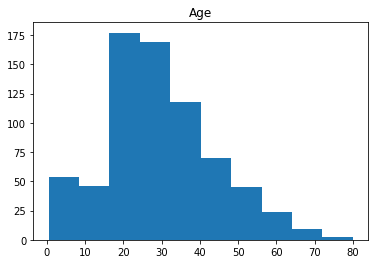

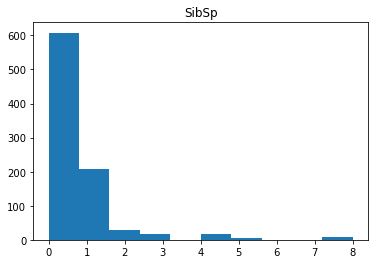

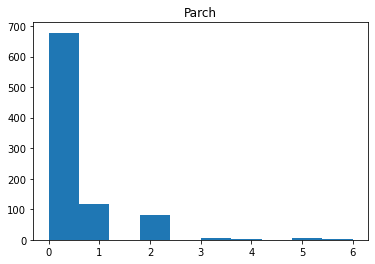

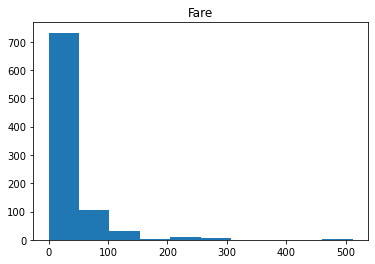

In [43]:
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

here, we can clearly see Parch and SibSp has the highest corelation because Parents will definetely travel with their multiple kids and spouses tend to travel together


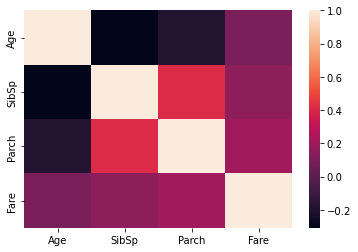

In [44]:
 #we plot a correlation heatmap between the numeric columns
    
sns.heatmap(df_num.corr())

print('here, we can clearly see Parch and SibSp has the highest corelation because Parents will definetely travel with their multiple kids and spouses tend to travel together')

In [45]:
#I also compare survival rates across the numeric variables. which reveal some interesting insights:

pd.pivot_table(data, index  ='Survived', values = ['Age', 'SibSp', 'Parch', 'Fare'])



,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


In [46]:
print("""The insight from the above table
1. The average age of 28 survived, which means a lot of the young aged survived
2. This shows that, travellers with high fare survived more, which also means those in first class,thus the rich people survived more, which is somehow very sad.
3. The parent Children survival rate is high, which could mean parent saved their children before saving themeseves
4. if you are a child and have siblings, you have less chance of surviving""")

The insight from the above table
1. The average age of 28 survived, which means a lot of the young aged survived
2. This shows that, travellers with high fare survived more, which also means those in first class,thus the rich people survived more, which is somehow very sad.
3. The parent Children survival rate is high, which could mean parent saved their children before saving themeseves
4. if you are a child and have siblings, you have less chance of surviving


# The features of survived and decease rates


from this plot, we can conclude that the number of first class passengers was higher and number of 
dead bodies was the third class passengers




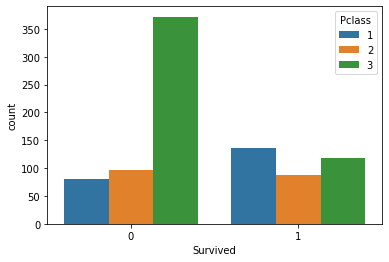

In [47]:
#P class

sns.countplot(x = 'Survived', hue='Pclass', data=data)

print("""
from this plot, we can conclude that the number of first class passengers was higher and number of 
dead bodies was the third class passengers

""")


The number of survivers were ladies, the ladies survived more as compared to the guys
It could be the guys were helping thei ladies to escape as has been guys identity, 
we portray our maculine to the ladies.




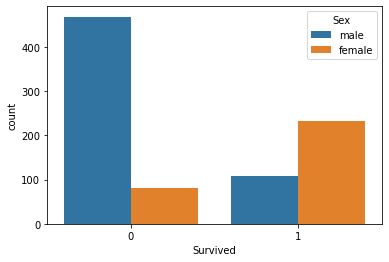

In [48]:
sns.countplot(data = data,x='Survived', hue='Sex')

print("""
The number of survivers were ladies, the ladies survived more as compared to the guys
It could be the guys were helping thei ladies to escape as has been guys identity, 
we portray our maculine to the ladies.

""")

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


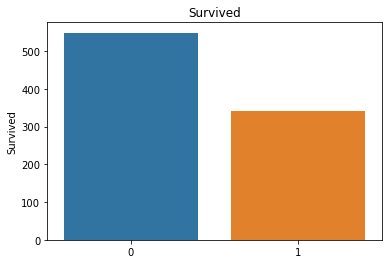

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


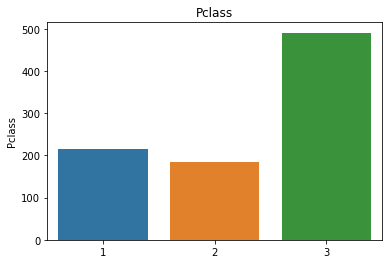

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


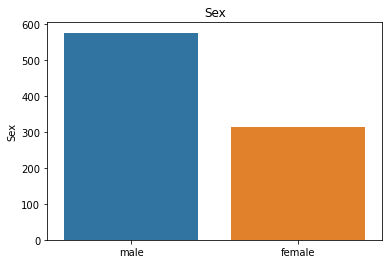

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


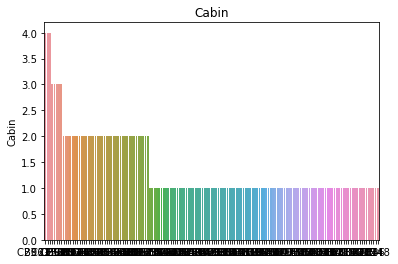

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


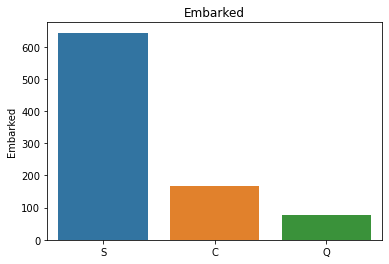

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


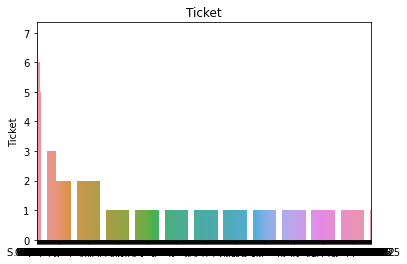

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


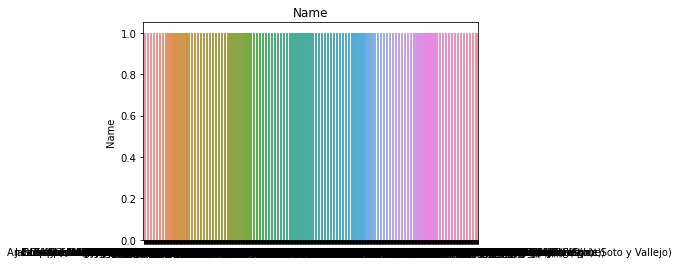

In [49]:
for i in df_cate.columns:
    sns.barplot(df_cate[i].value_counts().index,df_cate[i].value_counts()).set_title(i)
    plt.show()
   

In [50]:
#observations
print("""
1. Survived = A lost of people lost thier life, remaining about 300 people to survive
2. A lot of the travellers bought the 3rd class ticket and less had the 2nd class ticket
3. A lot of male board the ship, almost twice the ladies number
4. 
""")




1. Survived = A lost of people lost thier life, remaining about 300 people to survive
2. A lot of the travellers bought the 3rd class ticket and less had the 2nd class ticket
3. A lot of male board the ship, almost twice the ladies number
4. 



C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


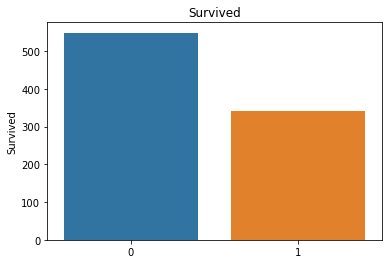

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


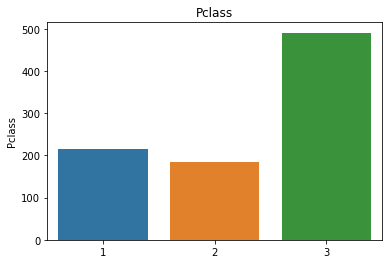

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


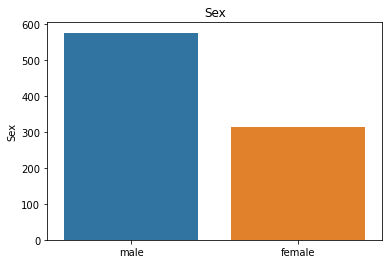

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


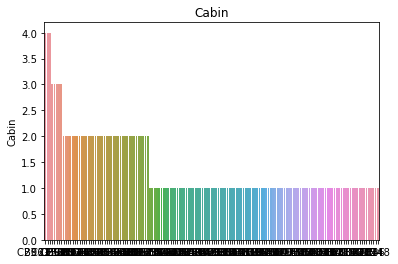

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


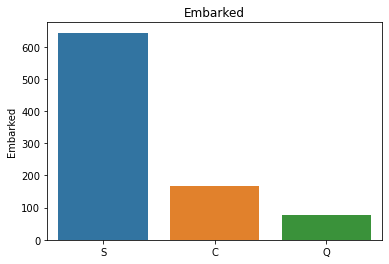

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


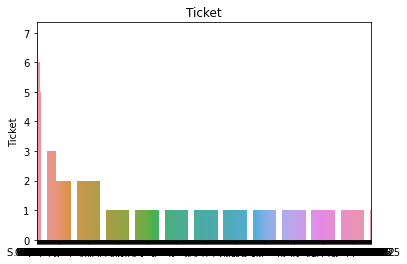

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


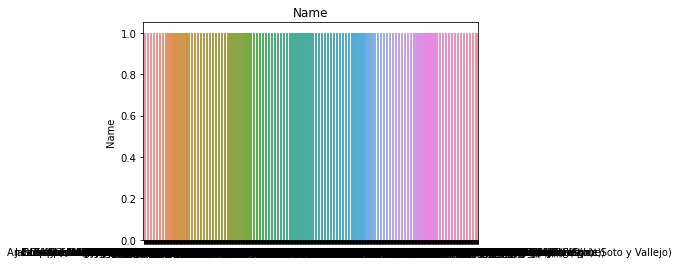

In [51]:
#Now we will do something similar to the pivot table above, but with our categorical variables, and compare them against our dependent variable, which is if people survived

for i in df_cate.columns:
    sns.barplot(df_cate[i].value_counts().index,df_cate[i].value_counts()).set_title(i)
    plt.show()


In [52]:
#Observations

In [53]:
print("""
1. Survived : Number of people who died exceed the number of survivors, more than half were saved
2. Pclass: ticket for 3rd class recorded the highest number of ticket sold,it can made of 1st and 2nd combine
3. twice the number of females made up of males, a lot of the male board the ship
4. Soughampton gave more passengers than the other two combined
""")


1. Survived : Number of people who died exceed the number of survivors, more than half were saved
2. Pclass: ticket for 3rd class recorded the highest number of ticket sold,it can made of 1st and 2nd combine
3. twice the number of females made up of males, a lot of the male board the ship
4. Soughampton gave more passengers than the other two combined



Now we will do something similar to the pivot table above, but with our categorical variables, and compare them against our dependent variable, which is if people survived:

In [54]:
print(pd.pivot_table(data, index = 'Survived' , columns='Pclass',values='Ticket', aggfunc = 'count' ))

print(pd.pivot_table(data, index = 'Survived' , columns='Sex',values='Ticket', aggfunc = 'count' ))

print(pd.pivot_table(data, index = 'Survived' , columns='Embarked',values='Ticket', aggfunc = 'count' ))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119
Sex       female  male
Survived              
0             81   468
1            233   109
Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


analysis from the above data

In [55]:
print("""
1. we can see that, the number of survivors in the first class exceed both the second and third class combined, meanwhile the 
total number of the passengers in the first class is less as compared to 3rd class

2. As we analysed earlier, males had the highest number on board but females survivors exceed the men.
Females were saved more as compared to males,

3. the survival rate differ base on the location they board the ship, Southampton gave the highest total numbers, because of their 
numbers, they recorded the highest survived rate and also death rate.
""")


1. we can see that, the number of survivors in the first class exceed both the second and third class combined, meanwhile the 
total number of the passengers in the first class is less as compared to 3rd class

2. As we analysed earlier, males had the highest number on board but females survivors exceed the men.
Females were saved more as compared to males,

3. the survival rate differ base on the location they board the ship, Southampton gave the highest total numbers, because of their 
numbers, they recorded the highest survived rate and also death rate.



FEATURE ENGINEERING

In [56]:
df_cate.Cabin
df_cate['Cabin_multiple'] = df_cate.Cabin.apply(lambda x:0 if pd.isna(x) else len(x.split(' ')) )
df_cate['Cabin_multiple'].value_counts()

C:\Users\USER\AppData\Local\Temp\ipykernel_3264\28293858.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cate['Cabin_multiple'] = df_cate.Cabin.apply(lambda x:0 if pd.isna(x) else len(x.split(' ')) )


0    687
1    180
2     16
3      6
4      2
Name: Cabin_multiple, dtype: int64

In [57]:
print('majority of the people own no cabin, that means there were not own a place on the ship, only few own more than one cabin')



majority of the people own no cabin, that means there were not own a place on the ship, only few own more than one cabin


let's see if it has influence on the survival rate

In [58]:
pd.pivot_table(df_cate, index = 'Survived', columns = 'Cabin_multiple', values = 'Sex', aggfunc='count')

Cabin_multiple,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


In [59]:
print("""from here, those with no cabin recorded the highest death rate and had the lrgest number on board, 
those who were able to afford at least one carbin had high surviving rate, still proving the rich continue to survive more""")

from here, those with no cabin recorded the highest death rate and had the lrgest number on board, 
those who were able to afford at least one carbin had high surviving rate, still proving the rich continue to survive more


In [60]:
df_cate['Cabin_adv'] = df_cate.Cabin.apply(lambda x: str(x)[0])

#comparing survival rate by cabin
print(df_cate.Cabin_adv.value_counts())

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin_adv, dtype: int64


C:\Users\USER\AppData\Local\Temp\ipykernel_3264\1356688249.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cate['Cabin_adv'] = df_cate.Cabin.apply(lambda x: str(x)[0])


In [61]:
pd.pivot_table(df_cate, index='Survived', columns='Cabin_adv', values = 'Sex', aggfunc= 'count')

Cabin_adv,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


In [62]:
print("""
This outcome give clear picture that those in cabin B and C had the highest survivng rate
this could mean their cabin was closer to the boats
""")


This outcome give clear picture that those in cabin B and C had the highest survivng rate
this could mean their cabin was closer to the boats



We will just divide the tickets into numeric and non-numeric for efficient usage:

In [63]:
df_cate['numeric_ticket'] = df_cate.Ticket.apply(lambda x:1 if x.isnumeric() else 0)
df_cate['letter_ticket'] = df_cate.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1])
                                                                          .replace('.','').replace('/','')
                                                                          .lower() if len(x.split(' ')[:-1])>0 else 0)

C:\Users\USER\AppData\Local\Temp\ipykernel_3264\2983352109.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cate['numeric_ticket'] = df_cate.Ticket.apply(lambda x:1 if x.isnumeric() else 0)
C:\Users\USER\AppData\Local\Temp\ipykernel_3264\2983352109.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cate['letter_ticket'] = df_cate.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1])


Another interesting thing we can look at is the title of individual passengers. And whether it played any role in them getting a seat in the lifeboats.

In [68]:
df_cate.Name.head()
df_cate['name_title'] = df_cate.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())                                          

df_cate['name_title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: name_title, dtype: int64

In [71]:
pd.pivot_table(df_cate, index='Survived',columns='name_title', values='Sex', aggfunc='count')

name_title,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Survived,,,,,,,,,,,,,,,,,
0,1.0,1.0,1.0,4.0,1.0,NaN,1.0,17.0,55.0,NaN,NaN,436.0,26.0,NaN,6.0,NaN,NaN
1,NaN,1.0,NaN,3.0,NaN,1.0,1.0,23.0,127.0,2.0,1.0,81.0,99.0,1.0,NaN,1.0,1.0


In [72]:
#data processing model

In [ ]:
#drop the null values from the embarked column

In [85]:

df_cate.dropna(subset = 'Embarked', inplace=True)

In [87]:
df_cate['Embarked'].isnull().sum()

0

In [90]:
new = [df_cate,df_num]
new_data = pd.concat(new)

new_data

,Survived,Pclass,Sex,Cabin,Embarked,Ticket,Name,Cabin_multiple,Cabin_adv,numeric_ticket,letter_ticket,name_title,Age,SibSp,Parch,Fare
0,0.0,3.0,male,NaN,S,A/5 21171,"Braund, Mr. Owen Harris",0.0,n,0.0,a5,Mr,NaN,NaN,NaN,NaN
1,1.0,1.0,female,C85,C,PC 17599,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1.0,C,0.0,pc,Mrs,NaN,NaN,NaN,NaN
2,1.0,3.0,female,NaN,S,STON/O2. 3101282,"Heikkinen, Miss. Laina",0.0,n,0.0,stono2,Miss,NaN,NaN,NaN,NaN
3,1.0,1.0,female,C123,S,113803,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1.0,C,1.0,0,Mrs,NaN,NaN,NaN,NaN
4,0.0,3.0,male,NaN,S,373450,"Allen, Mr. William Henry",0.0,n,1.0,0,Mr,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.0,0.0,0.0,13.00
887,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,0.0,0.0,30.00
888,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,23.45
889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0,0.0,0.0,30.00


In [96]:
new_data.isnull().sum()

Survived           891
Pclass             891
Sex                891
Cabin             1578
Embarked           891
Ticket             891
Name               891
Cabin_multiple     891
Cabin_adv          891
numeric_ticket     891
letter_ticket      891
name_title         891
Age               1066
SibSp              889
Parch              889
Fare               889
dtype: int64

In [97]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
